In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
path = "Bank Customer Churn Prediction.csv"
df = pd.read_csv(path)

In [188]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [189]:
df.shape

(10000, 12)

In [190]:
# Display summary statistics for a dataframe
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [191]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


# Exploring Data

In [192]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']

We have 2 categorical features : ['country', 'gender']


In [193]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

country
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64
---------------------------
gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64
---------------------------


##### insights - country column is highly biased to France

# Univariate analysis

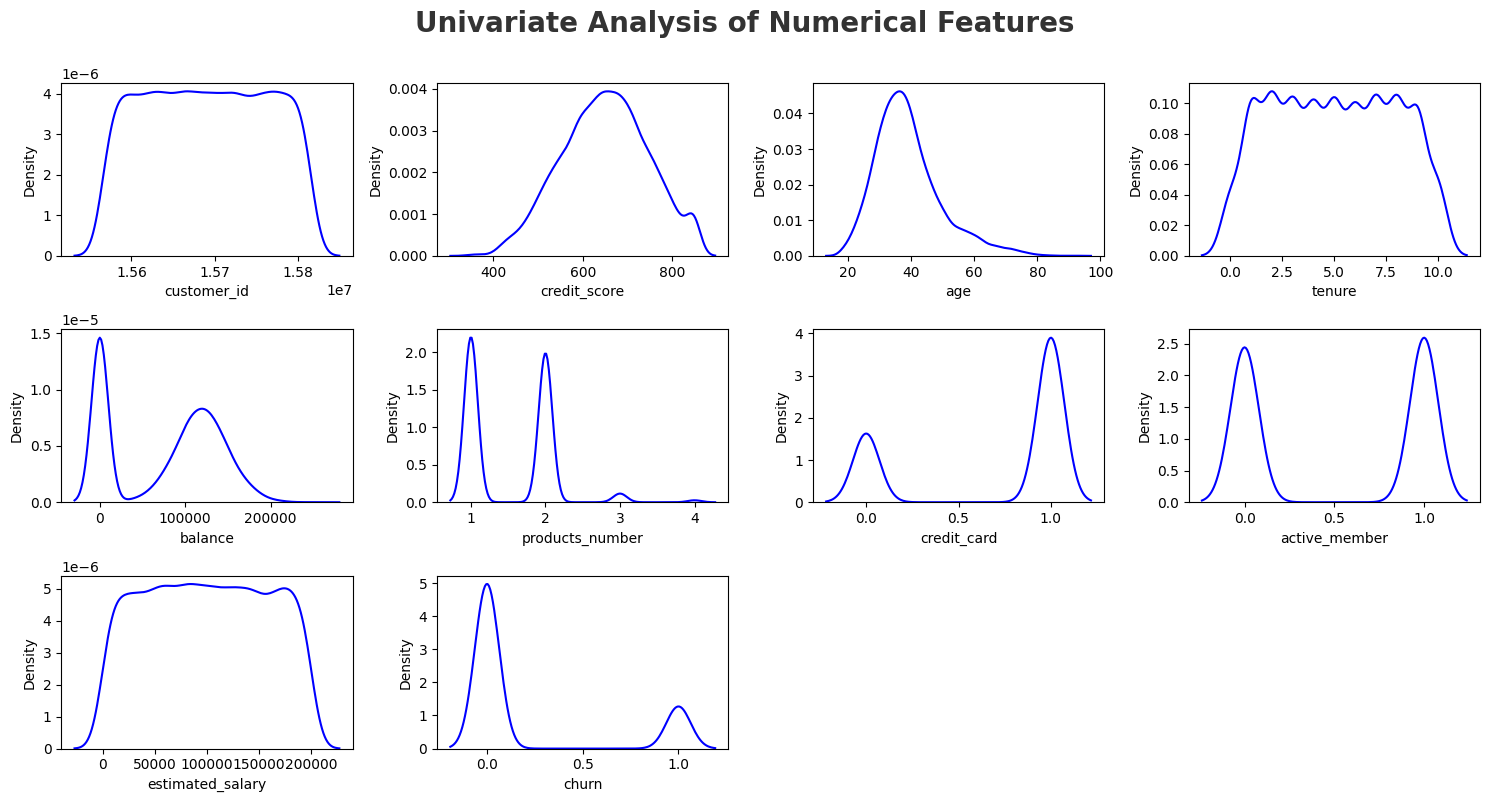

In [194]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

##### Insights
- tenture - looks like this most pf the values of this feature are within a specific range
- balance - there are two kind of balace values (0 balanc and continious value)
- salary - this feature is also looks like having a specific range of salary

#### Catrgorical Features

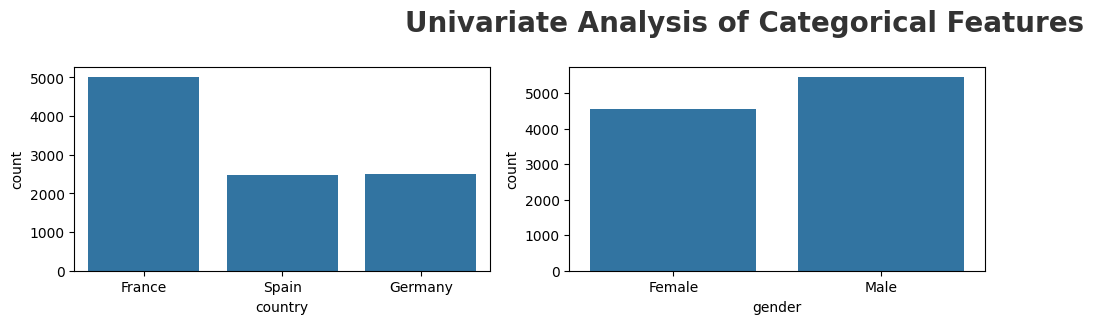

In [195]:
# categorical columns
#categorical_features.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

#### country column might looks biased to 'France'

## Multivariate Analysis

In [196]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 5 discrete features : ['tenure', 'products_number', 'credit_card', 'active_member', 'churn']

We have 5 continuous_features : ['customer_id', 'credit_score', 'age', 'balance', 'estimated_salary']


In [197]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['churn'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,country,Reject Null Hypothesis
1,gender,Reject Null Hypothesis


### Checking Null Values

In [198]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [199]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'estimated_salary']


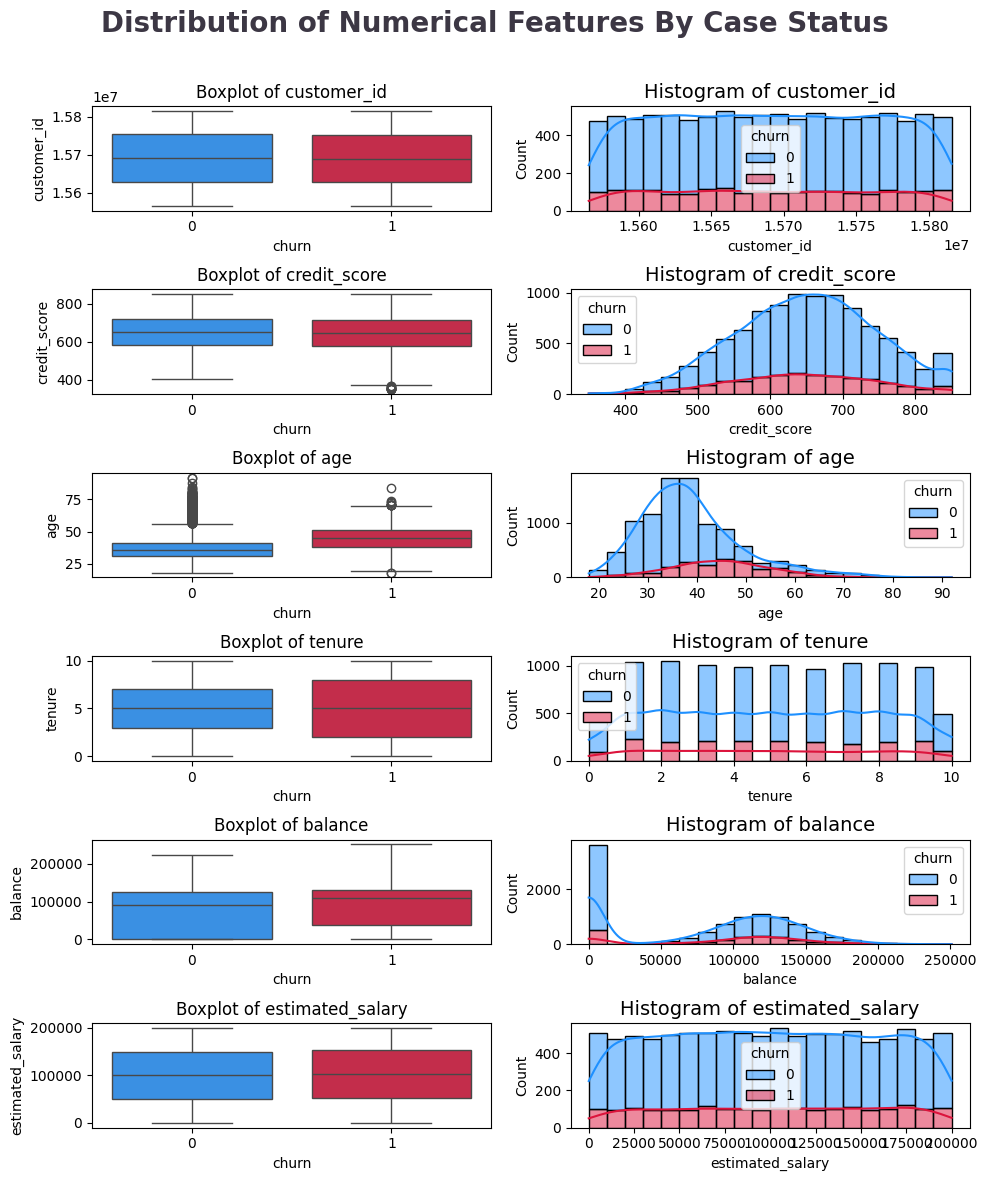

In [200]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(6, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='churn', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='churn', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

###### Initial Analysis Report

- Age is right skewed with some outliers
- There are no missing values
- The customer_id column can be deleted as each column has a unique value
- The 'churn' column is the target to predictions
- categorical columns are - ['country', 'gender']
- numeric columns are - ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']
- discrete feature columns are - ['tenure', 'products_number', 'credit_card', 'active_member', 'churn']
- continuos feature columns are - ['customer_id', 'credit_score', 'age', 'balance', 'estimated_salary']


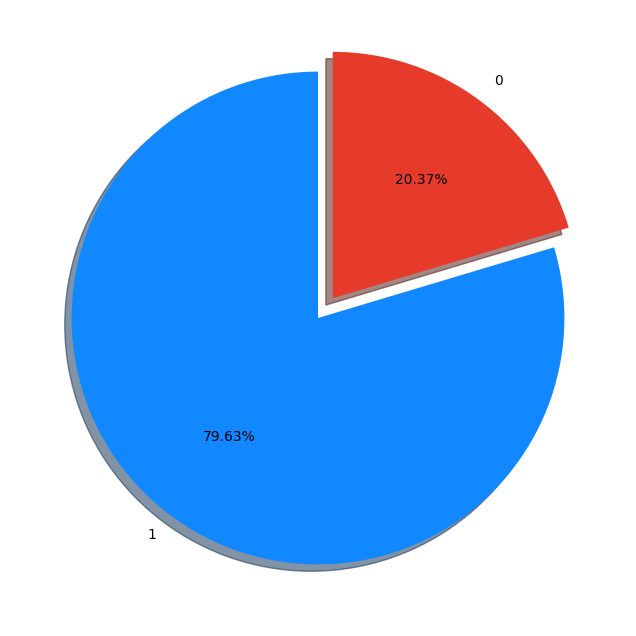

In [201]:
percentage = df.churn.value_counts(normalize=True)*100
labels = [1,0]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

### by looking at this we can identify thta the target variable is highly imbalanaced

In [202]:
#group data by continent and their count of case_status
df.groupby('country')['churn'].value_counts(normalize=True).to_frame()*100

proportion
country churn            
France  0       83.845233
        1       16.154767
Germany 0       67.556796
        1       32.443204
Spain   0       83.326605
        1       16.673395

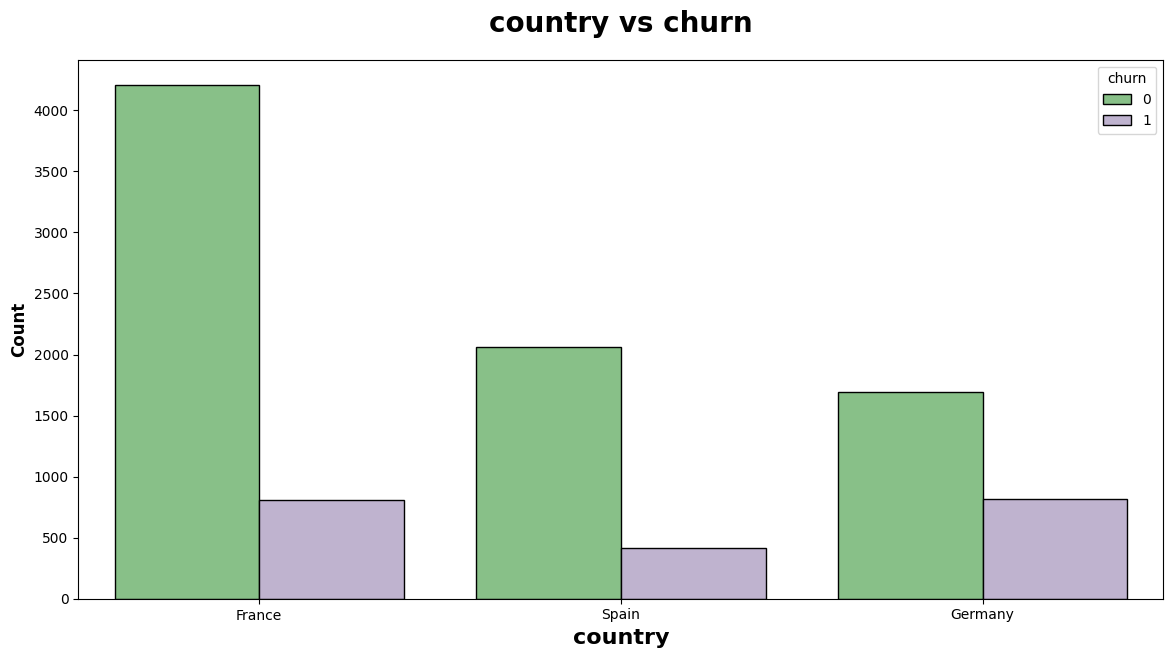

In [203]:
plt.subplots(figsize=(14,7))
sns.countplot(x="country",hue="churn", data=df, ec = "black",palette="Accent")
plt.title("country vs churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("country", weight="bold", fontsize=16)
plt.legend(title="churn", fancybox=True)
plt.show()

In [204]:
#group data by continent and their count of case_status
df.groupby('gender')['churn'].value_counts(normalize=True).to_frame()*100

proportion
gender churn            
Female 0       74.928461
       1       25.071539
Male   0       83.544072
       1       16.455928

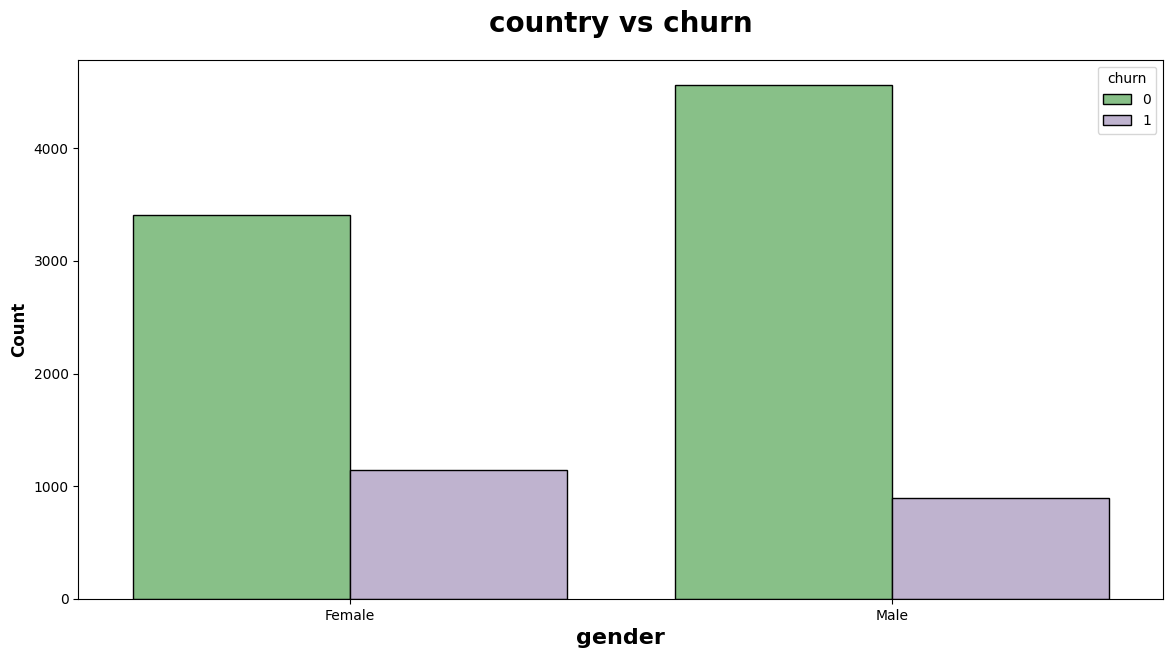

In [205]:
plt.subplots(figsize=(14,7))
sns.countplot(x="gender",hue="churn", data=df, ec = "black",palette="Accent")
plt.title("country vs churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("gender", weight="bold", fontsize=16)
plt.legend(title="churn", fancybox=True)
plt.show()

In [206]:
df2 = df.copy()

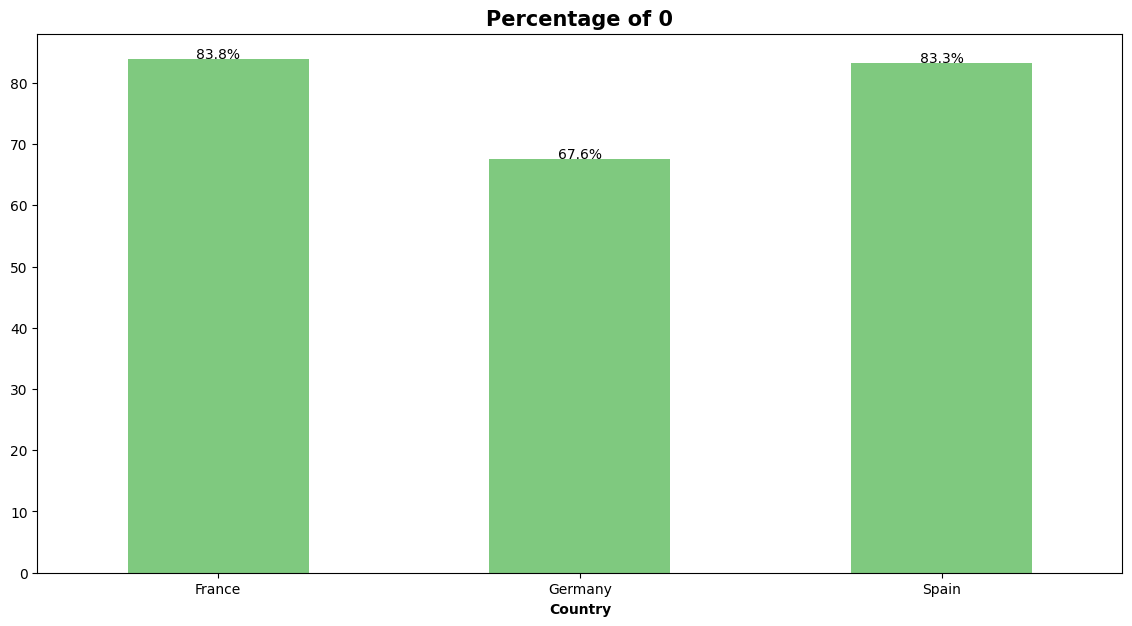

In [213]:
plt.figure(figsize=[14,7])

(100*df2[df2["churn"].isin([0])]['country'].value_counts()/df2['country'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of 0" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["churn"].isin([0])]['country'].value_counts()/df2['country'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Country' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()